In [1]:
import matplotlib.pyplot as plt
import numpy as np

from exercises.part4.LinUcbLearner import LinUcbLearner
from exercises.part4.LinearMabEnvironment import LinearMabEnvironment

In [2]:
n_arms = 10
T = 1000
n_experiments = 100
lin_ucb_rewards_per_experiment = []

env = LinearMabEnvironment(n_arms=n_arms,
                           dim=10)

In [3]:
for e in range(0, n_experiments):
    
    lin_ucb_learner = LinUcbLearner(arms_features=env.arms_features)
    
    for t in range(0, T):
        pulled_arm = lin_ucb_learner.pull_arm()
        reward = env.round(pulled_arm)
        lin_ucb_learner.update(pulled_arm, reward)
    
    lin_ucb_rewards_per_experiment.append(lin_ucb_learner.collected_rewards)
    

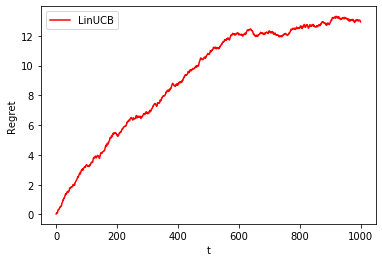

In [4]:
opt = env.opt()

plt.figure(0)

plt.ylabel('Regret')
plt.xlabel('t')

plt.plot(np.cumsum(np.mean(opt - lin_ucb_rewards_per_experiment, axis=0)), 'r')
plt.legend(['LinUCB'])
